In [ ]:
import tensorflow
import cv2
import os
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


Using TensorFlow backend.


In [ ]:
classifier = Sequential()
conv = Conv2D(32,(3,3),input_shape = (50,50,3) , activation = 'relu')
classifier.add(conv)

# Max Pooling(最大池化)
mp = MaxPooling2D(pool_size = (2,2))
classifier.add(mp)
# 再做一次Conv
conv1 = Conv2D(32,(3,3),activation = 'relu') 
classifier.add(conv1)
# Max Pooling again
mp1 = MaxPooling2D(pool_size = (2,2))
classifier.add(mp1)


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
classifier.add(Flatten())
# Fully Connected
# 128個神經元
# 第一層
classifier.add(Dense(units = 128 , activation = 'relu'))
# 第二層
classifier.add(Dense(units = 128 , activation = 'relu'))
# 2個類別 用softmax做輸出
classifier.add(Dense(units = 2 , activation = 'softmax'))



In [ ]:
classifier.compile(optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip= True
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory( './tr/',
                                 target_size = (50,50),
                                 batch_size = 10,
                                 class_mode = 'categorical')

testing_set  = test_datagen.flow_from_directory( './te/',
                                  target_size = (50,50),
                                  batch_size = 10,
                                  class_mode = 'categorical')


Found 1890 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                                   nb_epoch = 1000,
                                   nb_val_samples = 10,
                                   steps_per_epoch = 30,
                                   verbose = 1,
                                   validation_data = testing_set)

Epoch 1/1000
 2/30 [=>............................] - ETA: 2s - loss: 0.0266 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=30, verbose=1, validation_data=<keras_pre..., epochs=1000, validation_steps=10)`
  


30/30 [==============================] - 2s 59ms/step - loss: 0.0307 - acc: 0.9967 - val_loss: 0.3517 - val_acc: 0.9100
Epoch 2/1000
30/30 [==============================] - 2s 60ms/step - loss: 0.0764 - acc: 0.9667 - val_loss: 0.0992 - val_acc: 0.9700
Epoch 3/1000
30/30 [==============================] - 2s 61ms/step - loss: 0.0749 - acc: 0.9800 - val_loss: 0.3796 - val_acc: 0.9490
Epoch 4/1000
30/30 [==============================] - 2s 61ms/step - loss: 0.0688 - acc: 0.9800 - val_loss: 0.3960 - val_acc: 0.8900
Epoch 5/1000
30/30 [==============================] - 2s 60ms/step - loss: 0.0575 - acc: 0.9733 - val_loss: 0.2121 - val_acc: 0.9800
Epoch 6/1000
30/30 [==============================] - 2s 61ms/step - loss: 0.0650 - acc: 0.9800 - val_loss: 0.1284 - val_acc: 0.9490
Epoch 7/1000
30/30 [==============================] - 2s 62ms/step - loss: 0.0602 - acc: 0.9833 - val_loss: 0.3216 - val_acc: 0.9300
Epoch 8/1000
30/30 [==============================] - 2s 61ms/step - loss: 0.0526 

In [ ]:
%matplotlib inline

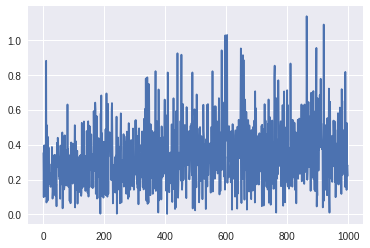

In [ ]:
plt.plot(history.history['val_loss'],label='val_loss')

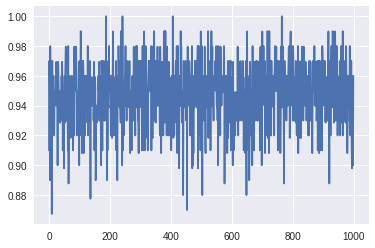

In [ ]:
plt.plot(history.history['val_acc'],label='val_acc')

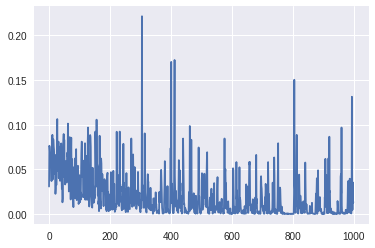

In [ ]:
plt.plot(history.history['loss'],label='loss')

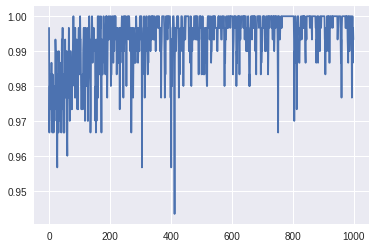

In [55]:
plt.plot(history.history['acc'],label='acc')

In [ ]:
import cv2
import numpy as np

imgp = []
imgn = []

for i in os.listdir('./te/p'):
    if 'jpg' in i:
        img = cv2.resize(cv2.imread('./te/p/'+i),(50,50))
        imgp.append(img)

for i in os.listdir('./te/n'):
    if 'jpg' in i:
        img = cv2.resize(cv2.imread('./te/n/'+i),(50,50))
        imgn.append(img)

    
imgp = np.asarray(imgp)
imgn = np.asarray(imgn)

imgp.shape

(169, 50, 50, 3)

In [53]:
classifier.predict_classes(imgp)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
classifier.predict_classes(imgn)

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1])

In [ ]:
import pickle

In [ ]:
data = {
    'classifier':classifier,
    'history':history
}

In [ ]:
with open('pikle.data','wb') as f:
    pickle.dump(data, f)